In [1]:
import xlrd
from numpy import *
from scipy import *
import numpy as np
from matplotlib.pyplot import *

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('Results_.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

vs   = array(Inputs.col_values(0)) #Import AMR Length [mm]
dP   = array(Inputs.col_values(1)) #Import AMR Height [mm]
vs_CB   = array(Inputs.col_values(2)) #Import AMR Length [mm]
dP_CB   = array(Inputs.col_values(3)) #Import AMR Height [mm]
Re_HB   = array(Inputs.col_values(4)) #Import AMR Length [mm]
Re_CB   = array(Inputs.col_values(5)) #Import AMR Height [mm]

In [3]:
Re = np.arange(0,25)

In [4]:
Inputs = Data.sheet_by_name('Data_8') 

vs_8   = array(Inputs.col_values(0)) #Import AMR Length [mm]
dP_8   = array(Inputs.col_values(1)) #Import AMR Height [mm]
Re_8   = array(Inputs.col_values(2)) #Import AMR Length [mm]

In [5]:
L = 50*10**-3
rho = 1000
d_p = 500*10**-6

In [46]:
def fit_int(X,a,b): 
    vs =  X
    #Epsilon = 0.465
    Epsilon = 0.46
    mu_f = 0.0007
    dp = 0.0005
    rho_f = 1000
    
    return (a*(1-Epsilon)**2/Epsilon**3*mu_f*vs/dp**2 + b*(1-Epsilon)/Epsilon**3*rho_f*vs**2/(dp))

In [47]:
Coef = curve_fit(fit_int,(vs_8),dP_8,maxfev=10000)
Coef

(array([0.28355988, 0.00088927]), array([[ 7.86840418e-04, -1.34132545e-05],
        [-1.34132545e-05,  2.36090549e-07]]))

In [48]:
aux = np.arange(0,30)

In [50]:
m = 120/3600
A = np.pi*(23*10**-3)**2/4
vs_H = m/1000/A
vs_H
fit_int(vs_H,0.10841338,0.00039666)

101.28980394019018

In [33]:
vs_8

array([0.03261054, 0.03414116, 0.03329082, 0.03339002, 0.03377268,
       0.03377268, 0.03462302, 0.03341837, 0.0349915 , 0.02579365,
       0.02443311, 0.02563776, 0.02743764, 0.0268424 , 0.02748016,
       0.02821712, 0.03062642, 0.0309949 , 0.02782029, 0.04709467,
       0.04913549, 0.04668367, 0.04699546, 0.04547902, 0.04717971,
       0.04539399, 0.03853458, 0.04589002, 0.04285714, 0.04628685,
       0.04750567, 0.04580499, 0.0444161 , 0.0475907 , 0.04579082,
       0.04481293, 0.04485544, 0.04373583, 0.03592687, 0.03486395,
       0.03574263, 0.03540249, 0.03595522, 0.03619615, 0.03622449,
       0.03585601, 0.03605442, 0.02742347, 0.03010204, 0.02767857,
       0.03137755, 0.02960601, 0.0309949 , 0.03479308, 0.03231293,
       0.03224206, 0.03487812, 0.05371315, 0.05265023, 0.05056689,
       0.05106293, 0.0482568 , 0.04798753, 0.04427438, 0.04277211,
       0.03438209, 0.05253685, 0.0494898 , 0.04981576, 0.04900794,
       0.05089286, 0.04973073, 0.04893707, 0.04912132, 0.04971

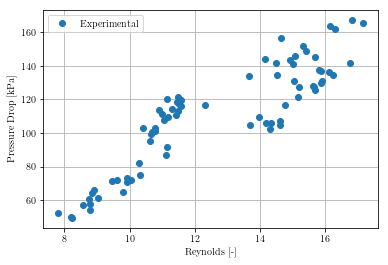

In [38]:
#plt.semilogy(Re_HB,dP,'o',label = 'Experimental')
plt.plot(Re_8,dP_8,'o',label = 'Experimental')
#plt.plot(Re_CB,dP_CB,'o',label = 'Cold Blow')
#semilogy(Re_HB,fit_int(vs,150,1.75,0.345)*(50*10**-3)/1000,'x',label = 'Ergun - 0.345')
#semilogy(Re_8,fit_int((vs_8),0.10841338,0.00039666),'x',label = 'Ergun - 0.235')
#plot(Re_HB,fit_int(vs,150,1.75,0.465)*(50*10**-3)/1000,'x',label = 'Ergun - 0.465')
#plot(Re_HB,fit_int(vs,9/4*150,3/2*1.75)*(50*10**-3)/1000,'x',label = 'Ergun (?)')
#plot(Re_HB,fit_int(vs,Coef[0][0],Coef[0][1],0.37)*(50*10**-3)/1000,'x',label = 'Modified')
plt.legend()
plt.grid()
plt.xlabel('Reynolds [-]')
plt.ylabel('Pressure Drop [kPa]')
plt.savefig('dP.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
semilogy(Re_8,fit_int(vs_8,150,1.75,0.36)*(100*10**-3)/1000,'x',label = 'Ergun - 0.235')

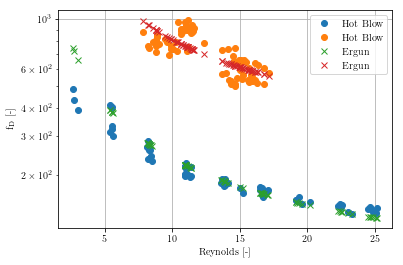

In [57]:
plt.semilogy(Re_HB,dP*1000/L*2*d_p/(rho*vs**2),'o',label = 'Hot Blow')
plt.semilogy(Re_8,dP_8*1000/(2*L)*2*d_p/(rho*vs_8**2),'o',label = 'Hot Blow')
#plt.plot(Re_CB,dP_CB*1000/L*2*d_p/(rho*vs_CB**2),'o',label = 'Cold Blow')
plot(Re_HB,fit_int(vs,150,1.75,0.345)*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Ergun')
plot(Re_8,fit_int(vs_8,150,1.75,0.235)*(100*10**-3)/1000*1000/(2*L)*2*d_p/(rho*vs_8**2),'x',label = 'Ergun')
#plot(Re_HB,fit_int(vs,9/4*150,3/2*1.75)*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Ergun (?)')
#plot(Re_HB,fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Modified')
plt.legend()
plt.grid()
plt.xlabel('Reynolds [-]')
plt.ylabel('f$_\mathrm{D}$ [-]')
plt.savefig('f.png',format = 'png', dpi=500,bbox_inches='tight')

In [12]:
#plot(vs,dP,'o')
plot(dP,fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000,'o')
plot(dP,fit_int(vs,150,1.75)*(50*10**-3)/1000,'o')
plt.grid()
plot(aux,1.1*aux,'k--')
plot(aux,0.9*aux,'k--')
plt.text(15,11,'- 10\%')
plt.text(11,17,'+ 10\%')
plt.xlabel('Pressure Drop - Experimental [kPa]')
plt.ylabel('Pressure Drop - Correlation [kPa]')

plt.savefig('Corr_Nova.png',format = 'png', dpi=500,bbox_inches='tight')

TypeError: fit_int() missing 1 required positional argument: 'Epsilon'

In [38]:
erro = np.abs(dP-fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000)/dP*100

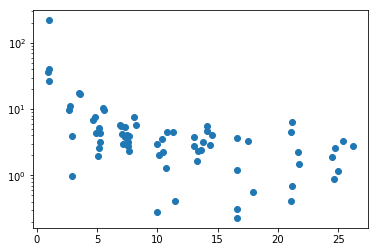

In [51]:
plt.semilogy(dP,erro,'o')
#plt.ylim([0,10])